#  Tartan design replication

 Pattern being duplicating : https://www.tartanregister.gov.uk/tartanDetails?ref=23

In [1]:
import re # will help us seperate letter and digits efficiently 
a = 'LP4 K2 OT10 DP30 OT30 G55 K4 O6 K4 G55 OT30 DP30 OT10 K2 LP4' #list of colors and widths
c = re.findall(r'[A-Z]+',a)  # seperate letters
tmp = re.findall(r'\d+',a)  # seperate digits
w = [int(x) for x in tmp] 
print(c,w)

['LP', 'K', 'OT', 'DP', 'OT', 'G', 'K', 'O', 'K', 'G', 'OT', 'DP', 'OT', 'K', 'LP'] [4, 2, 10, 30, 30, 55, 4, 6, 4, 55, 30, 30, 10, 2, 4]


In [2]:
colordict = {'LP' : [180/255, 104/255, 172/255],      #create our color dictionary, assigning the RGB values to each color 
'K' : [16/255, 16/255, 16/255],                       # divide by 255 because we want it in range from (0,1)
'OT' : [96/255, 56/255, 0],
'DP' : [68/255, 0, 68/255],
'G' : [0, 104/255, 24/255],
'O' : [216/255, 124/255, 0]}
colordict

{'LP': [0.7058823529411765, 0.40784313725490196, 0.6745098039215687],
 'K': [0.06274509803921569, 0.06274509803921569, 0.06274509803921569],
 'OT': [0.3764705882352941, 0.2196078431372549, 0],
 'DP': [0.26666666666666666, 0, 0.26666666666666666],
 'G': [0, 0.40784313725490196, 0.09411764705882353],
 'O': [0.8470588235294118, 0.48627450980392156, 0]}

In [3]:
import matplotlib.cm as cm         
import matplotlib.pyplot as plt
import numpy as np
n = 1000                                # n is number of of dimensions 
vert_s= np.zeros((n,n,3))                # create nxn matrix with 3 for R,G,B
z=0
while z < n:                            
    for i in range(len(w)):                  # iterate over legnth of colors or digits list, same amount
        vert_s[:,z:z+w[i],:]=colordict[c[i]] # assign vertical matrix to corresponding i value. 
                                             # we know that this is a pattern, so it should create pattern from 0 to len(w)
                                             #For vertical component we want the width to be from z to z+ new width. This way
                                             # we have no overlaps but the pattern continues building off from previous
        z += w[i]                            # assign current value to z so it can be used to continue pattern
plt.figure(figsize=(10,8))
plt.imshow(vert_s,interpolation = 'bicubic')  #bicubic smoothes the pattern out
plt.show()

<Figure size 1000x800 with 1 Axes>

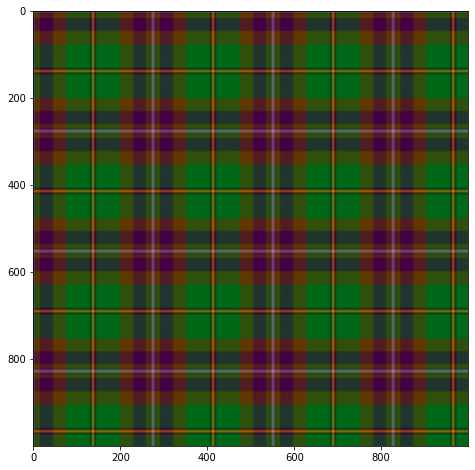

In [4]:
horz_s = vert_s.transpose(1,0,2)                        # horizontal stripes are just trasnpose of veritcal
checker =np.zeros((n,n,3))                              # make new matrix nxnx3 to place both vertical and horiz
for x in range(n):                                      # x and y are coord we will replace with respective vert and horiz coord
    for y in range(n):
        if (x%2==0 and y%2==0) or (x%2!=0 and y%2!=0):   #check if both x and y are even or odd
            temp = vert_s                                # if both are even or both are odd we place vertical stripes in temp array
        else:
            temp = horz_s                                #else we place horizontal stripes
        checker[x,y,:] = temp[x,y,:]                     # we then replace the empty array with x,y values of temp array
plt.figure(figsize=(10,8))                               #this way we create a checkered design
plt.imshow(checker,interpolation = 'bicubic')
plt.show()

In [5]:
def show_tartan(n):                #putting code into our main function to simplfy the process
    a = 'LP4 K2 OT10 DP30 OT30 G55 K4 O6 K4 G55 OT30 DP30 OT10 K2 LP4'
    c = re.findall(r'[A-Z]+',a)  
    tmp = re.findall(r'\d+',a)  
    w = [int(x) for x in tmp] 
    colordict = {'LP' : [180/255, 104/255, 172/255],'K' : [16/255, 16/255, 16/255],'OT' : [96/255, 56/255, 0], 'DP' : [68/255, 0, 68/255], 'G' : [0, 104/255, 24/255], 'O' : [216/255, 124/255, 0]}
    vert_s= np.zeros((n,n,3))                
    z=0
    while z < n:                            
        for i in range(len(w)):                  
            vert_s[:,z:z+w[i],:]=colordict[c[i]] 
            z += w[i]
    horz_s = vert_s.transpose(1,0,2)                        
    checker =np.zeros((n,n,3))                              
    for x in range(n):                                      
        for y in range(n):
            if (x%2==0 and y%2==0) or (x%2!=0 and y%2!=0):   
                temp = vert_s                                
            else:
                temp = horz_s                                
            checker[x,y,:] = temp[x,y,:]                     
    plt.figure(figsize=(10,8))                               
    plt.imshow(checker,interpolation = 'bicubic')
    plt.show()                                             

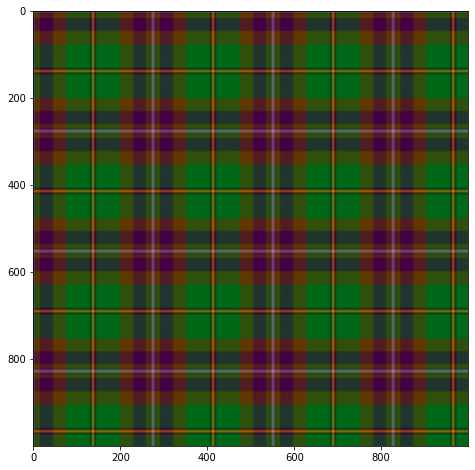

In [6]:
show_tartan(1000)

## Resources : 
* Pattern : https://www.tartanregister.gov.uk/tartanDetails?ref=23
* Color pattern help from  MTH 337 